### EDA, Exploratory Data Analysis, is the first step in the process of building an ML model. The main intention of performing EDA is Data Sanitation. Let's perform EDA on a sample dataset.

#### Step 1: Download all the libraries which we generally use while performing EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
train_df = pd.read_csv('train.csv')

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Titanic dataset.
    b. The main intention of building a model on Titanic dataset is to predict the survival of passenger based  on the details we have.
    c. This is a classification problem with two classes, one for survival and zero for non-survival.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### By having a look at the data above, we got to know that attributes such as Passenger ID, Name and Ticket can be excluded from the analysis because those attributes have unique values for each passenger. As of now, we will proceed with the values. Because, when we apply 'duplicate()', we may get many rows as duplicated. We can remove the attributes before starting with the model building.

#### Step 5: Get to know the structure of the data set using 'info()'method. Using this we can get to know below things:
    a. Data types of attributes in the data set
    b. Whether any of the attributes in the data set has null values

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### By having a look at info above, we got to know that three fields, Age, Cabin and Embarked, have null values.

#### Step 6: Get the 6-point summary using 'describe()' method. If we add Mean to 5-point summary, it becomes 6-point summary. Using this we can do Univariate analysis on continuous data and get to know below things:
    a. Based on Mean and Median of each attribute, we can get to know how the data in that attribute is distribu-ted. This can be applied for Continuous data. For example, based on Mean and Median values in Age attribute we can say that the distribution of values in Age are skewed a bit towards right because Mean is towards the right of Median and both the values are close.
    b. We can get to see whether there are any outliers based on the Min and Max values. Sometimes we may have  to include values which are tagged as outliers. For example, max value in Age attribute is 80. As per the   mathematical formula, 80 is an outlier. But in real world, an age of 80 years is a normal case. So, we don't consider it as outlier.

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Step 7: We have to do Univariate analysis for discrete data such as Pclass, SibSp, Parch and Embarked. We can do this one attribute after the other using 'value_counts()' method. Using this we can get to know below things:
    a. Whether there is a chance that different discrete values affect the target variable in different ways.   For this there must be sufficient distribution among different discrete values. For example, if there is a  discrete attribute with 10 different values, 90% of the values belong to one discrete value and the rest 10% is distributed among seven other discrete values, we cannot get to know how those discrete values affect the target variable. As per the info below, Embarked has decent distribution of values.

In [6]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Step 7(continuation): We can also plot bar plots for each of the discrete attribute and get to know this in a more understandable way. Using this we can get to know below things:
    a. Whether the discrete attribute is overly distributed. Let's say there are 900 different values in a discr-ete attribute, it would be difficult to find the relationship between each one of them and the target varib-le. In the current dataset, we donot have anything like this.
    b. Whether we can club the values in discrete attribute. In the current data set, there are fields such as   SibSp and Parch. These represent number of Siblings/Spouses aboard and Number of Parents/Children aboard res-pectively. As we can see in the graphs below, there is limited distribution from values greater than 2. So, we can club values from 2 and title it as 'Greater than 1'.

In [12]:
def bar_plot(variable):
      
    # get feature 
    var = train_df[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

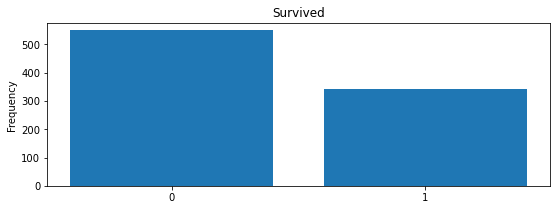

Survived:
0    549
1    342
Name: Survived, dtype: int64


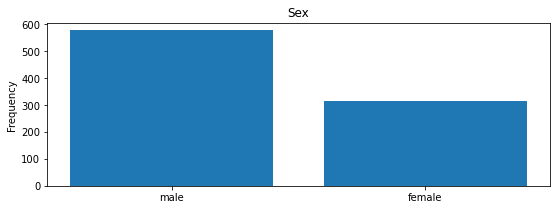

Sex:
male      577
female    314
Name: Sex, dtype: int64


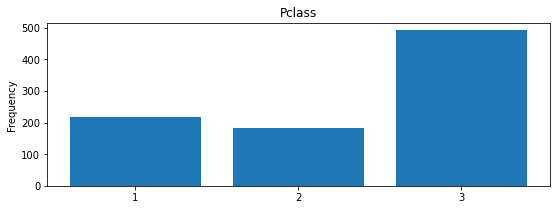

Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


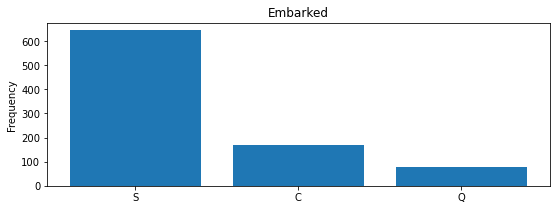

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


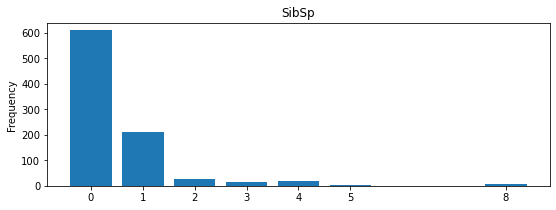

SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


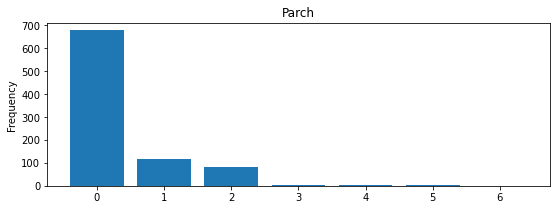

Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [13]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

#### Step 8: Check the type of distribution continuous attributes have and compare it with Normal distribution. We can do this by plotting Histogram using 'distplot()' method. In this case we can verify the distributions of 'Fare' and 'Age' as below. 'Fare' is skewed a lot towards right and 'Age' is skewed a bit towards the right.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

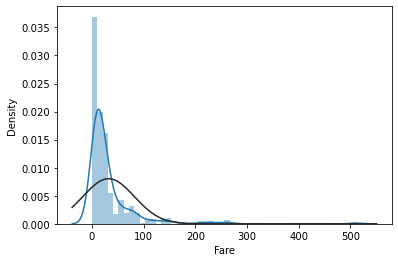

In [14]:
sns.distplot(train_df['Fare'],fit=norm)

<AxesSubplot:xlabel='Age', ylabel='Density'>

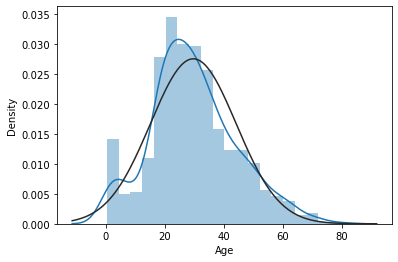

In [15]:
sns.distplot(train_df['Age'],fit=norm)

#### Step 8(continuation): We can also plot Histograms using below method.

In [16]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

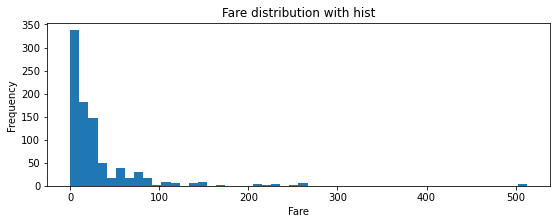

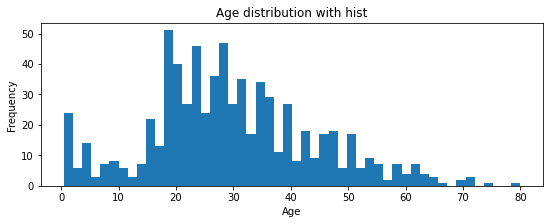

In [17]:
numericVar = ["Fare","Age"]
for n in numericVar:
    plot_hist(n)

### Data Sanitation: After the Univariate analysis is done, we try to do Data sanitation steps. There are three Data sanitation steps as follows.
    a. Identification and treatment of Missing values
    b. Identification and treatment of Outliers
    c. Clearing the duplicates

#### Step 9: Identification and treatment of Missing values. We have already Identified which columns have missing values. We will use below strategy to treat missing values on a high level. But, the actual treatment varies from case to case.
    a. If there are more than 50% of Null values in an attribute, we will remove that attribute 
    b. If there are less than 50% of the Null values in an attribute and if the attribute is discrete, we will  replace it with Mode
    c. If there are less than 50% of the Null values in an attribute and if the attribute is continuous, we will replace it with Median

#### Step 9(Continuation): To get the count of missing values in an attribute, we use isnull() function on the dataframe. By this we got to know that Age, Cabin and Embarked fields have null values.

In [18]:
# Identify missing values using isnull()
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Step 9(Continuation): We can also use heatmap() on the data frame to get a sense of missing values in the dataframe visually.

<AxesSubplot:>

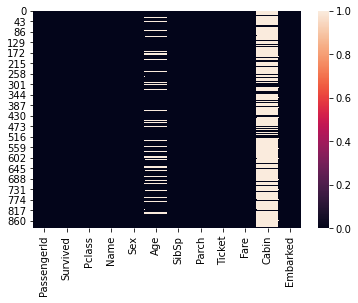

In [19]:
sns.heatmap(train_df.isnull())

#### Step 9(Continuation): Treatment of missing values in Embarked. Since Emarked is a categorical variable and has around 0.3% of missing values, We can follow two strategies.
    a. We can replace the missing values with Mode - Mostly followed
    b. We can remove those two rows since it forms a very miniscule percentage of the data - Rarely used

#### Usually, we replace the values with mode because when we plot the histogram, we will get two peaks, one for Mean and another for Mode. But, when we replace the values with mean, we will have only one peak, a little higher one. Let's proceed with Mode replacement for this time.

In [20]:
# 'S' is the Mode of Embarked
train_df["Embarked"] = train_df["Embarked"].fillna('S')

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Step 9(Continuation): Treatment of missing values in Cabin. Since the missing value percentage is around 70, we can remove the attribute. We do this because, when the missing value percentage is more than 50, we cannot get a clear relationship between the target variable and the corresponding attribute. 

In [22]:
train_df.drop('Cabin', inplace=True, axis=1)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Step 9(Continuation): Treatment of missing values in Age. Since the attribute is continuous, we can follow two strategies.
    a. Central tendency strategy
    b. Predictive strategy

#### Step 9(Continuation): Central tendency strategy - In Central Tendency strategy, there are two ways of replacing missing values.
    a. Generalised Imputation: If the attribute has less than 5% of the missing values and if we are following  central tendency strategy, we can replace missing values with Median. This is Generalised Imputation.
    b. Like case imputation: If the attribute has more than 5% of the missing values and if we are following    central tendency strategy, we can do like case imputation. Like case imputation is replacing the missing    values with Median of that particular category.

#### Let's follow basic version of Like case imputation and replace the missing values of 'Age' attribute

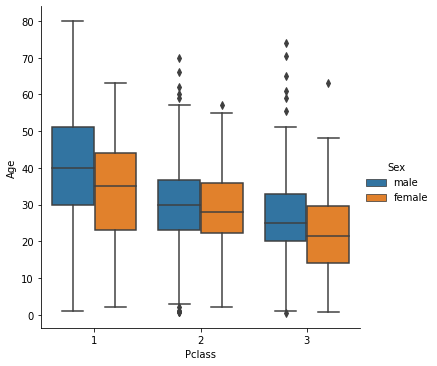

In [24]:
AS = sns.factorplot(y="Age", x="Pclass", hue="Sex", data = train_df, kind="box")

##### As we can see, Median values are getting changed when Two categorical attributes Sex and Pclass are taken into consideration. So, let's replace on the basis of this.

In [25]:
# We are taking a data set of three columns 'Age', 'Pclass' and 'Sex'. 
# Based on 'Pclass' and 'Sex', we are replacing missing values in 'Age'.
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    Sex = df[2]
    
    if pd.isnull(Age):
        if Pclass == 1 and Sex == 'male': return 40
        elif Pclass == 1 and Sex == 'female': return 35
        elif Pclass == 2 and Sex == 'male': return 30
        elif Pclass == 2 and Sex == 'female': return 28
        elif Pclass == 3 and Sex == 'male': return 26
        else: return 24
    else:
        return Age

# We are passing three rows from train_df('Age', 'Pclass' and 'Sex') and appplying 'AgeImpute' function on 'Age'
train_df['Age'] = train_df[['Age' , 'Pclass', 'Sex']].apply(AgeImpute, axis = 1)

In [26]:
# Now we don't have missing values in the dataframe
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Step 9(Continuation): Predictive strategy - This is advanced strategy to replace missing values. In simple words, it is advanced version of like case imputaion. There multiple ways in Predictive strategy which we are going to study later. As of now we can remember that Regression based models will help us predict the missing values and we use those predicted values to replace missing values.

#### Step 10: Identification and treatment of Outliers. Outliers are something which are practically not correct. Sometimes a few values can be tagged as mathematical outliers based on the IQR approach. But, with the help of Intuition and Domain knowledge, we have to see whether the mathematical outliers are actually outliers. There are many algorithms to treat these values. But we will look at it in the future classes.

#### Step 10(continuation): Let's use below algorithm to detect Mathematical outliers in 'Age' attribute

In [27]:
# Mathematical Outlier detection

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [28]:
train_df.loc[outliers_iqr(train_df["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,S
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.00,0,0,237442,13.5000,S


In [29]:
print('Min age is:', train_df["Age"].min())
print('Max age is:',  train_df["Age"].max())

Min age is: 0.42
Max age is: 80.0


##### As we can see above, there are many values in 'Age' tagged as outliers. But when we see the min and max values in 'Age', those values are not Outliers practically. Hence we have designed another Algorithm below with additional steps to cap the values and identify real outliers.

In [30]:
# Mathematical Outlier detection with capping function

def outliers_iqr_cap(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = min((quartile_1 - (iqr * 1.5)), 0)
    upper_bound = max((quartile_3 + (iqr * 1.5)), 100)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [31]:
train_df.loc[outliers_iqr_cap(train_df["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#### Step 10(continuation): Sometimes when there are multiple rows tagged as outliers, we remove those rows from the Dataframe. Below is the algorithm to identify rows with more than one outlier.

In [32]:
# Outlier detection with additional logic

def detect_outliers(df,features):
    outlier_indices = []

#for each attribute in features, we detect the outlier row numbers and add them to 'outlier_indices'
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
    
# After the Outlier row numbers are added for all the attributes, we run a counter function to fetch how many times a row number is present in 'outlier_indices'
    outlier_indices = Counter(outlier_indices)
    
# After the counter is run, we get output something like this: {11: 1, 33:1, 54:1, 195:2, 268:2}
# Now we create a list of row numbers whose counter value is  greater than 2, in above example rows like 195 and 268
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [33]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,C
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,S
159,160,0,3,"Sage, Master. Thomas Henry",male,26.00,8,2,CA. 2343,69.5500,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,24.00,8,2,CA. 2343,69.5500,S


##### Now we are removing the rows which have more than 2 outliers

In [34]:
train_df.shape
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop = True)
train_df.shape

(875, 11)

#### Step 11: This is the last step of Data Sanitation. In this step we try to find the duplicate rows using 'duplicated()' function.

In [35]:
# Check for duplicates
duplicate = train_df[train_df.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [36]:
# This will return boolean values of True and False, where True means the row is duplicated and viceversa
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
870    False
871    False
872    False
873    False
874    False
Length: 875, dtype: bool

#### Step 12: Bivariate Analysis - We do Bivariate analysis to get a sense of whether each of the categorical attributes is distributed properly with respect to the Target variable.

In [37]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.632850
1,2,0.472826
2,3,0.245868


In [38]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.746753
1,male,0.188713


In [39]:
# SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.536585
2,2,0.464286
0,0,0.344884
4,4,0.166667
3,3,0.153846
5,5,0.000000


In [40]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.547826
2,2,0.544118
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [41]:
# Embarked vs Survived
train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.554217
1,Q,0.389610
2,S,0.340190


#### Step 12(Continuation): As we can see above attributes Pclass and Sex have good distribution compared to other attributes.

### This would end EDA Analysis for Titanic Dataset. Usually afte this part, we start with Modelling.